------
## Podsumowanie

In [1]:
import pandas as pd
import numpy as np

In [2]:
# generowanie przykłądowych danych
np.random.seed(42)
dane = np.random.normal(loc=70, scale=10, size=30)  # loc - średnia, scale - odchylenie

In [3]:
df = pd.DataFrame({"Wynik": dane})
print("Dane:", df.head())

Dane:        Wynik
0  74.967142
1  68.617357
2  76.476885
3  85.230299
4  67.658466


In [4]:
srednia = df['Wynik'].mean()
mediana = df['Wynik'].median()
dominanta = df["Wynik"].mode()[0]

In [5]:
print(f"Średnia:", srednia)
print(f"Mediana:", mediana)
print(f"Dominanta:", dominanta)  # wartość najcześćiej wystepujaca

Średnia: 68.11853104148962
Mediana: 67.65854834163741
Dominanta: 50.86719755342202


In [6]:
wariancja = df["Wynik"].var()
odch_stand = df['Wynik'].std()
roztep = df['Wynik'].max() - df["Wynik"].min()

In [7]:
print(f"Wariancja:", wariancja)
print(f"Odchylenie standardowe:", odch_stand)
print(f"Rozstęp:", roztep)

Wariancja: 81.00115693656517
Odchylenie standardowe: 9.000064274024112
Rozstęp: 34.924930601651894


In [8]:
print(f"Wariancja: {wariancja:.2f}")
print(f"Odchylenie standardowe: {odch_stand:.2f}")
print(f"Rozstęp: {roztep:.2f}")

Wariancja: 81.00
Odchylenie standardowe: 9.00
Rozstęp: 34.92


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram wyników')

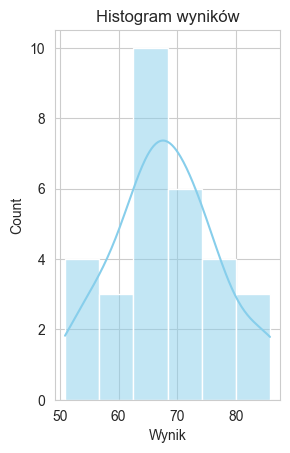

In [11]:
plt.subplot(1, 2, 1)
sns.histplot(df["Wynik"], kde=True, color="skyblue")
plt.title("Histogram wyników")

Text(0.5, 1.0, 'Wykres pudełkowy (boxplot)')

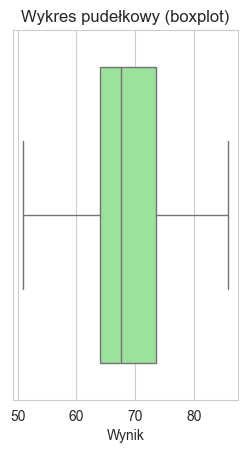

In [13]:
# wykres ramka-wąsy
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Wynik"], color="lightgreen")
plt.title("Wykres pudełkowy (boxplot)")
